In [1]:
%pip install tensorflow

   ---------------------------------------- 0.0/375.9 MB ? eta -:--:--
   ---------------------------------------- 1.0/375.9 MB 10.1 MB/s eta 0:00:38
    --------------------------------------- 5.0/375.9 MB 15.1 MB/s eta 0:00:25
   - -------------------------------------- 9.7/375.9 MB 18.3 MB/s eta 0:00:21
   - -------------------------------------- 14.7/375.9 MB 19.6 MB/s eta 0:00:19
   -- ------------------------------------- 19.7/375.9 MB 20.4 MB/s eta 0:00:18
   -- ------------------------------------- 24.6/375.9 MB 21.1 MB/s eta 0:00:17
   --- ------------------------------------ 29.6/375.9 MB 21.4 MB/s eta 0:00:17
   --- ------------------------------------ 34.1/375.9 MB 21.2 MB/s eta 0:00:17
   ---- ----------------------------------- 39.6/375.9 MB 21.7 MB/s eta 0:00:16
   ---- ----------------------------------- 45.1/375.9 MB 22.1 MB/s eta 0:00:15
   ----- ---------------------------------- 50.1/375.9 MB 22.3 MB/s eta 0:00:15
   ----- ---------------------------------- 55.6/375


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
df = pd.read_csv("Simple_Sales_Serie.csv")
display(df)


,date_num,Group,ProductId,ZoneId,Sales_$
0,1393,g3,p28,z23,0.016090
1,1449,g3,p28,z23,0.016090
2,1418,g3,p28,z23,0.013985
3,1464,g3,p28,z23,0.016090
4,1446,g3,p28,z23,0.016090
...,...,...,...,...,...
3041,1485,g3,p28,z23,0.262556
3042,1483,g3,p28,z23,0.204211
3043,1482,g3,p28,z23,0.189624
3044,1484,g3,p28,z23,0.175038


import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

data= df.drop_duplicates(subset='date_num', keep='first')  # or keep='last'

# Load your data (assuming it's in a CSV file)
data['date'] = pd.to_datetime(data['date'])
data = data.sort_values('date')

# Normalize the sales data
scaler = MinMaxScaler(feature_range=(0, 1))
data['sales_scaled'] = scaler.fit_transform(data['Sales_$'].values.reshape(-1, 1))

display(data)

In [10]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

data= df.drop_duplicates(subset='date_num', keep='first')  # or keep='last'

# Load your data (assuming it's in a CSV file)
data = data.sort_values('date_num')

# Normalize the sales data
scaler = MinMaxScaler(feature_range=(0, 1))
data['sales_scaled'] = scaler.fit_transform(data['Sales_$'].values.reshape(-1, 1))

display(data)

,date_num,Group,ProductId,ZoneId,Sales_$,sales_scaled
2851,0,g3,p28,z23,0.020752,0.021070
2478,1,g3,p28,z23,0.062256,0.062560
624,2,g3,p28,z23,0.228271,0.228521
474,3,g3,p28,z23,0.280150,0.280384
1234,4,g3,p28,z23,0.134887,0.135168
...,...,...,...,...,...,...
3017,1510,g3,p28,z23,0.089323,0.089619
3016,1511,g3,p28,z23,0.074436,0.074737
3018,1512,g3,p28,z23,0.133985,0.134266
3020,1513,g3,p28,z23,0.119098,0.119384


In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
sequence_length =12
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(sequence_length, 1)))
model.add(Dense(64, activation='relu')) 
model.add(Dense(64, activation='relu'))  
model.add(Dense(1))
model.compile(optimizer=Adam(learning_rate=0.0001), loss='mse')

# Model summary
model.summary()

c:\Users\fmend\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 64)             │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,281 (98.75 KB)

 Trainable params: 25,281 (98.75 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
# Create time series sequences
def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:(i + sequence_length)])
        y.append(data[i + sequence_length])
    return np.array(X), np.array(y)

sequence_length = 3  # Number of time steps to look back
X, y = create_sequences(data['sales_scaled'].values, sequence_length)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [13]:
# Reshape to [samples, timesteps, features]
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
sequence_length =12
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(sequence_length, 1)))
model.add(Dense(64, activation='relu')) 
model.add(Dense(64, activation='relu'))  
model.add(Dense(1))
model.compile(optimizer=Adam(learning_rate=0.0001), loss='mse')

# Model summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 64)             │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,281 (98.75 KB)

 Trainable params: 25,281 (98.75 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
history = model.fit(
    X_train, y_train,
    epochs=200,
    batch_size=1,
    validation_data=(X_test, y_test),
    verbose=1
)

Epoch 1/200
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0276 - val_loss: 0.0123
Epoch 2/200
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0123 - val_loss: 0.0123
Epoch 3/200
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0140 - val_loss: 0.0122
Epoch 4/200
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0118 - val_loss: 0.0123
Epoch 5/200
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0128 - val_loss: 0.0125
Epoch 6/200
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0133 - val_loss: 0.0121
Epoch 7/200
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0134 - val_loss: 0.0122
Epoch 8/200
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0119 - val_loss: 0.0126
Epoch 9/200
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0121 - val_loss: 0.0122
Epoch 10/200
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0114 - val_loss: 0.0121
Epoch 11/200
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0122 - val_loss: 0.0121
Epoch 12/200
1182/1

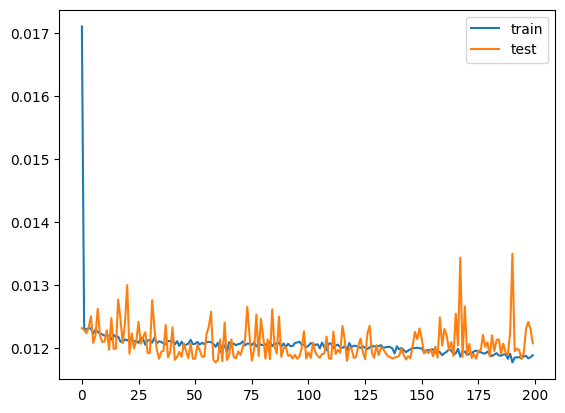

In [16]:
import matplotlib.pyplot as plt

# Plot training history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()


37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


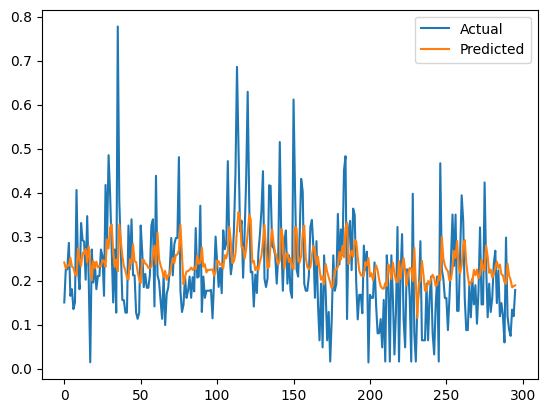

In [17]:

# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Inverse transform the scaling
train_predict = scaler.inverse_transform(train_predict)
y_train_actual = scaler.inverse_transform(y_train.reshape(-1, 1))
test_predict = scaler.inverse_transform(test_predict)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot predictions vs actual
plt.plot(y_test_actual, label='Actual')
plt.plot(test_predict, label='Predicted')
plt.legend()
plt.show()

In [18]:
def predict_future(model, last_sequence, future_steps):
    predictions = []
    current_sequence = last_sequence.copy()
    
    for _ in range(future_steps):
        # Get prediction for current sequence
        current_pred = model.predict(current_sequence.reshape(1, sequence_length, 1))[0,0]
        predictions.append(current_pred)
        
        # Update sequence with new prediction
        current_sequence = np.roll(current_sequence, -1)
        current_sequence[-1] = current_pred
    
    return np.array(predictions)

# Get the last sequence from your data
last_sequence = data['sales_scaled'].values[-sequence_length:]

# Predict next 5 time steps
future_predictions_scaled = predict_future(model, last_sequence, 5)
future_predictions = scaler.inverse_transform(future_predictions_scaled.reshape(-1, 1))

print("Future predictions:", future_predictions.flatten())

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Future predictions: [-0.271719   -0.36872315 -0.51146543 -0.71205693 -1.0080354 ]


In [19]:
from sklearn.metrics import mean_squared_error
import numpy as np

def calculate_rmse(actual, predicted):
    return np.sqrt(mean_squared_error(actual, predicted))

def calculate_mape(actual, predicted): 
    actual, predicted = np.array(actual), np.array(predicted)
    # Avoid division by zero
    non_zero_mask = actual != 0
    actual = actual[non_zero_mask]
    predicted = predicted[non_zero_mask]
    return np.mean(np.abs((actual - predicted) / actual)) * 100


In [20]:
# Calculate metrics for training set
train_rmse = calculate_rmse(y_train_actual, train_predict)
train_mape = calculate_mape(y_train_actual, train_predict)

# Calculate metrics for test set
test_rmse = calculate_rmse(y_test_actual, test_predict)
test_mape = calculate_mape(y_test_actual, test_predict)

print(f"Train RMSE: {train_rmse:.2f}")
print(f"Train MAPE: {train_mape:.2f}%")
print(f"Test RMSE: {test_rmse:.2f}")
print(f"Test MAPE: {test_mape:.2f}%")

Train RMSE: 0.11
Train MAPE: 52.03%
Test RMSE: 0.11
Test MAPE: 89.18%
